In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.display import display, Math

In [3]:
sp.init_printing()

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

# Enoncé

Consider a monopoly market in which consumers’ opportunity cost $x$ is uniformly distributed on the unit interval; i.e.,$x\in [0, 1]$. 
A consumer’s utility of consuming one unit of the good offered by the monopolist relative to the outside option is $\frac{1}{4} + \frac{n^e}{2} -p - x$, where 
- $p$ is the price set by the monopolist 
- $n^e$ is the expected number of fellow buyers of the good. 
There is mass one of consumers. 
The monopolist’s marginal costs are zero.

## Introduction des symboles et expressions correspondantes

In [4]:
ne, p, x = sp.symbols("n^e p x")
ne, p, x

In [5]:
utilite_consommateur = sp.S(1) / 4 + ne / 2 - p - x
display(Math(f"U={sp.latex(utilite_consommateur)}"))

<IPython.core.display.Math object>

# Question 1

Suppose that consumers believe that $n^e = 1$.
Determine the monopoly solution under these consumer believes.

## Récupération de la demande


**A FAIRE** Pourquoi résout-on $\text{utilite_consommateur} = 0$?

In [6]:
equation = sp.Eq(utilite_consommateur.subs(ne, 1), 0)
equation

In [7]:
x1, = sp.solve(equation, x)
x1

## Expression du programme

In [8]:
profit = p * x1
profit

On cherche alors
$$ \underset{p\in \mathbb{R}^+}{\sup} \mathrm{profit}$$

## Existence

Comme on a 

In [9]:
sp.limit(profit, p, +sp.oo)

On en déduit que le $\sup$ est un $\max$.

## Calcul des points critiques

Si il est atteint à l'intérieur on a

In [10]:
pm, = sp.solve(sp.diff(profit, p), p)
pm

In [11]:
nm, = sp.solve(utilite_consommateur.subs({ne: 1, p: pm}), x)
nm

In [12]:
profitm = profit.subs(p, pm)
profitm

## Gestion du bord

Le profit est une fonction concave, on en déduit donc qu'un point critique est un maximum global.

In [13]:
sp.diff(profit, p, p)

**REMARQUE** on aurait pu comparer la valeur en ce point avec la valeur au bord et prendre la plus grande des deux.

In [37]:
sp.Lt(profit.subs(p, 0), profitm)

True

# Question 2

Suppose that consumers form beliefs $n^e$ before observing price $p$ and that these beliefs are confirmed in equilibrium; i.e. 
$$n^e=n^∗.$$ 
Determine the monopoly solution under these consumer beliefs.

## Récupération de la demande

In [15]:
equation2 = sp.Eq(utilite_consommateur, 0)
equation2

In [16]:
x2, = sp.solve(equation2, x)
x2

## Expression du programme

In [17]:
profit2 = p * x2
profit2

In [18]:
sp.latex(profit2)

'p \\left(\\frac{n^{e}}{2} - p + \\frac{1}{4}\\right)'

On cherche donc à résoudre

$$
\underset{p\geq 0}{\sup} p \left(\frac{n^{e}}{2} - p + \frac{1}{4}\right)
$$


## Existence

Comme

In [19]:
sp.limit(profit2, p, + sp.oo)

La fonction est coercive, le $\sup$ est atteint, et on a un $\max$.

## Recherche des points critiques

Si il est atteint en un point intérieur on a forcément un point critique:

In [20]:
pm2, = sp.solve(sp.diff(profit2, p), p)
pm2

In [21]:
ns, = sp.solve(utilite_consommateur.subs({p: pm2}), x)
ns

## Gestion du bord

Comme on a

In [22]:
sp.diff(profit2, p, p)

Le profit est concave par rapport à $p$ et un point critique est forcément un maximum global.

## ??

Comme par hypothèse $n^* = n^e$ on a 

In [23]:
equation2b = sp.Eq(ns, ne)
equation2b

In [24]:
ne2, = sp.solve(equation2b, ne)
ne2

In [25]:
profit2b = profit2.subs(ne, ne2)
profit2b

On refait la démarche précédente

In [26]:
sp.limit(profit2b, p, +sp.oo)

In [27]:
pm2b, = sp.solve(sp.diff(profit2b, p), p)
pm2b

In [28]:
nm2 = ne2
display(nm2)

In [57]:
pr2 = profit2b.subs(p, pm2b)
pr2

**ATTENTION** il faudrait argumenter que les points critiques sont bien strictement dans l'intérieur du domaine de maximisation.
On peut au moment de la création de symboles rajouter de l'information à priori via des argument nommés de type `positive=True` et `real=True`.

# Question 3

Suppose that consumers first observe price and then form beliefs
$$n^e(p)$$ 
and that beliefs are self-fulfilling; i.e., they are confirmed in the monopoly solution. 
Determine the monopoly solution under these consumer beliefs.

In [30]:
x3, = sp.solve(utilite_consommateur, x)
x3

In [31]:
equation3 = sp.Eq(x3, ne)
display(equation3)
n3, = sp.solve(equation3, ne)
display(n3)

In [32]:
profit3 = x3.subs({ne: n3}) * p
display(profit3)
print(sp.latex(profit3))


p \left(\frac{1}{2} - 2 p\right)


On cherche à résoudre
$$
\underset{p\geq 0}{\sup} p \left(\frac{1}{2} - 2 p\right)
$$
Comme

In [33]:
sp.limit(profit3, p, +sp.oo)

Le $\sup$ est en fait un $\max$.

S'il est atteint à l'intérieur c'est forcément un point critique.

In [34]:
equation3b = sp.Eq(sp.diff(profit3, p), 0)
display(equation3b)
pm3, = sp.solve(equation3b, p)
display(pm3)

Comme on peut calculer 

In [35]:
sp.diff(profit3, p, p)

La fonction profit est concave dont un point critique est un maximum global.

On récupère le profit et la demande correspondante par

In [59]:
pr3 = profit3.subs(p, pm3)
display(pr3)
nm3 = x3.subs({p: pm3, ne: n3})
display(nm3)

**REMARQUE** pour améliorer la présentation on pourrait passer les phrases d'introduction avec du latex dans display avant les objets eux mêmes.

# Question 4

Compare your findings in parts 2 and 3. Explain what is going on.

In [39]:
equation_demande_2 = sp.Eq(utilite_consommateur.subs(ne, ne2), 0)
display(equation_demande_2)

In [40]:
equation_demande_3 = sp.Eq(n3, x)
display(equation_demande_3)

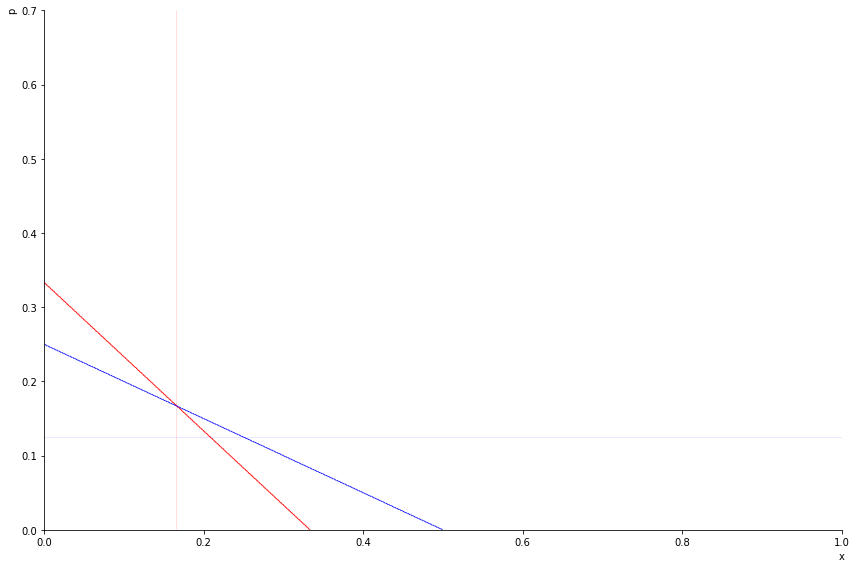

In [41]:
courbe_demande_2 = sp.plot_implicit(
    equation_demande_2, 
    (x, 0, 1), 
    (p, 0, 0.7),
    show=False
)
courbe_demande_2[0].line_color = "red"
equilibre_2_y = sp.plot_implicit(sp.Eq(p, pm2b), (x, 0, 1), (p, 0, pm2b), show=False)
equilibre_2_x = sp.plot_implicit(sp.Eq(x, nm2), (x, 0, nm2), (p, 0, 0.7), show=False)
equilibre_2_y[0].line_color = "red"
equilibre_2_x[0].line_color = "red"
courbe_demande_2.extend([equilibre_2_y[0], equilibre_2_x[0]])

courbe_demande_3 =  sp.plot_implicit(
    equation_demande_3, 
    (x, 0, 1), 
    (p, 0, 0.7),
    show=False
)
courbe_demande_2.append(courbe_demande_3[0])

equilibre_3_y = sp.plot_implicit(sp.Eq(p, pm3), (x, 0, 1), (p, 0, pm3), show=False)
equilibre_3_x = sp.plot_implicit(sp.Eq(x, nm3), (x, 0, nm3), (p, 0, 0.7), show=False)
courbe_demande_2.extend([equilibre_3_y[0], equilibre_3_x[0]])

courbe_demande_2.show()

In [95]:
display(ne2, pm2b, pr2)
display(nm3, pm3, pr3)
demande2 = utilite_consommateur.subs(ne, ne2)
display(demande2)
inter2, = sp.solve(demande2.subs(p, 0), x)
display(inter2)
demande3 = n3 - x
display(demande3)
inter3, = sp.solve(demande3.subs(p, 0), x)
display(inter3)

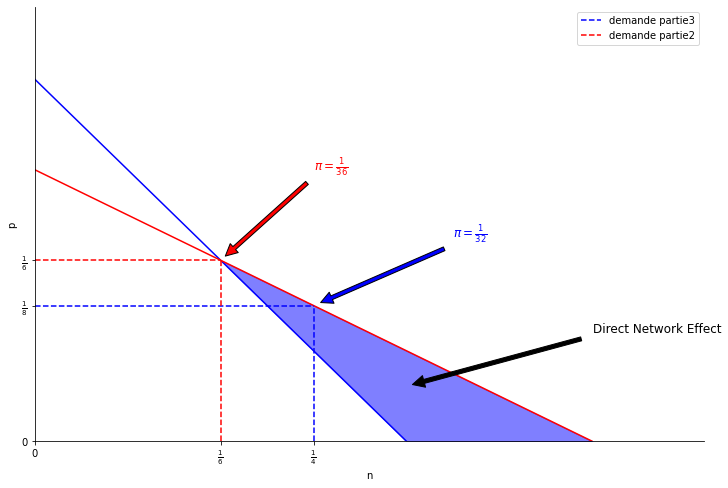

In [107]:
x_max, p_max = 0.6, 0.4
X, P = np.meshgrid(np.linspace(0, x_max), np.linspace(0, y_max))

D2 = sp.lambdify(args=(x, p), expr=demande2)(X, P)
D3 = sp.lambdify(args=(x, p), expr=demande3)(X, P)

figure, repere = plt.subplots()

repere.spines["left"].set_position("zero")
repere.spines["bottom"].set_position("zero")
repere.spines["right"].set_color("none")
repere.spines["top"].set_color("none")
repere.set_xlabel("n")
repere.set_ylabel("p")

repere.set_xlim(0, x_max)
repere.set_xticks([0, ne2.evalf(), nm3.evalf()])
repere.set_xticklabels([0, f"${sp.latex(ne2)}$", f"${sp.latex(nm3)}$"])
repere.set_ylim(0, p_max)
repere.set_yticks([0, pm3.evalf(), pm2b.evalf()])
repere.set_yticklabels([0, f"${sp.latex(pm3)}$", f"${sp.latex(pm2b)}$"])

repere.plot(
    [0, nm3.evalf()], 
    [pm3.evalf(), pm3.evalf()], 
    color="blue", 
    linestyle="--",
    label="demande partie3"
)
repere.plot(
    [nm3.evalf(), nm3.evalf()], 
    [0, pm3.evalf()], 
    color="blue", 
    linestyle="--"
)

repere.plot(
    [0, ne2.evalf()], 
    [pm2b.evalf(), pm2b.evalf()], 
    color="red", 
    linestyle="--",
    label="demande partie2"
)
repere.plot(
    [ne2.evalf(), 
     ne2.evalf()], 
    [0, pm2b.evalf()], 
    color="red", 
    linestyle="--"
)

repere.contour(X, P, D2, levels=[0], colors="blue")
repere.contour(X, P, D3, levels=[0], colors="red")

repere.annotate(
    text=f"$\pi={sp.latex(pr2)}$", 
    xy=(ne2.evalf(), pm2b.evalf()),
    xytext=(1.5 * ne2.evalf(), 1.5 * pm2b.evalf()),
    arrowprops=dict(facecolor='red', shrink=0.05),
    color="red",
    fontsize="large"
)
repere.annotate(
    text=f"$\pi={sp.latex(pr3)}$", 
    xy=(nm3.evalf(), pm3.evalf()),
    xytext=(1.5 * nm3.evalf(), 1.5 * pm3.evalf()),
    arrowprops=dict(facecolor='blue', shrink=0.05),
    color="blue",
    fontsize="large"
)

ordonne32, = sp.solve(demande3.subs(x, inter2), p)
abc = [ne2.evalf(), inter2.evalf(), inter3.evalf()]
bas = [pm2b.evalf(), 0, 0]
haut = [pm2b.evalf(), ordonne32.evalf(),0]
repere.fill_between(
    [float(nbr) for nbr in abc],
    [float(nbr) for nbr in bas],
    [float(nbr) for nbr in haut],
    color="blue",
    alpha=0.5
)

repere.annotate(
    text="Direct Network Effect",
    xy=(0.33, 0.05),
    xytext=(0.5, 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize="large"
)

repere.legend()

**REMARQUE** on note l'intérêt d'améliorer la nomenclature entre les parties!

# Question 5

Suppose that there is a second group of consumers (of mass 1) who also have an opportunity costxthat is uniformly distributed on the unit interval.   The utility of consumerxin this second group is
$$1=4+n^e_1(p_1)=2−p_2−x,$$
where 
- $n^e_1(p_1)$ is the expected number of consumers in the first group buying theproduct 
- price $p_2$ is the price charged to the second group of consumers. 

Suppose that, similar to part 3, consumers of both groups first observe prices and then form beliefs. 
Thus, a consumer $x$ in the first group has net utility
$$1=4+n^e_1(p_1)=2−p_1−x.$$
Suppose that consumers from both groups hold self-fulfilling beliefs. 
Determine the monopoly solution (prices and quantities) under these consumer beliefs.

In [42]:
p1, p2 = sp.symbols("p_1 p_2")
p1, p2

In [43]:
ne1 = sp.Function("n^e_{1}")(p1)
ne1

In [44]:
utilite1 = sp.S(1) / 4 + ne1 / 2 - p1 - x
display(utilite1)
utilite2 = sp.S(1) / 4 + ne1 / 2 - p2 - x
display(utilite2)

In [45]:
demande1, = sp.solve(utilite1, x)
demande2, = sp.solve(utilite2, x)

profit = p1 * demande1 + p2 * demande2
display(demande1, demande2, profit)
print(sp.latex(profit))

p_{1} \left(- p_{1} + \frac{\operatorname{n^e_{1}}{\left(p_{1} \right)}}{2} + \frac{1}{4}\right) + p_{2} \left(- p_{2} + \frac{\operatorname{n^e_{1}}{\left(p_{1} \right)}}{2} + \frac{1}{4}\right)


On cherche maintenant à effectuer
$$
\underset{p_1\geq 0, p_2\geq 0}{\sup} p_{1} \left(\frac{n^e_{1}(p_1)}{2} - p_{1} + \frac{1}{4}\right) + p_{2} \left(\frac{n^e_{1}(p_1)}{2} - p_{2} + \frac{1}{4}\right)
$$

In [46]:
H = sp.hessian(profit, (p1, p2))
display(H)

⎡     2                       2                                               
⎢    d                       d                                                
⎢p₁⋅────(n_{1}__e(p₁))   p₂⋅────(n_{1}__e(p₁))                           d    
⎢      2                       2                                        ───(n_
⎢   dp₁                     dp₁                   d                     dp₁   
⎢───────────────────── + ───────────────────── + ───(n_{1}__e(p₁)) - 2  ──────
⎢          2                       2             dp₁                          
⎢                                                                             
⎢                           d                                                 
⎢                          ───(n_{1}__e(p₁))                                  
⎢                          dp₁                                                
⎢                          ─────────────────                                  
⎣                                  2                

**ATTENTION** Suite à reprendre car $n^e_1$ dépendait de $p_1$!

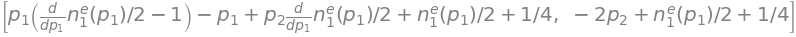

In [47]:
gradient = [sp.diff(profit, p1), sp.diff(profit, p2)]
display(gradient)

In [48]:
sol, = sp.solve(gradient, (p1, p2), dict=True)
display(sol)

NotImplementedError: could not solve 4*_Dummy_27*(n^e_{1}(p_1)/4 + 1/8) + 4*p_1*(_Dummy_27 - 4) + 4*n^e_{1}(p_1) + 2

On voit que le point critique est dans l'intérieur du domaine de maximisation donc grâce à la stricte concavité il s'agit de l'unique maximum global.

Comme les consommateurs on des croyances auto-réalisatrices on en déduit

In [49]:
nm31, = sp.solve(sp.Eq(utilite1.subs(x, ne1), 0), ne1)
display(nm31)
nm32, = sp.solve(sp.Eq(utilite2.subs(x, ne1)))

/home/vincent/miniconda3/lib/python3.8/site-packages/sympy/core/relational.py:492: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


# Question 6

Within the setting of part 5, suppose that the monopolist is forced to charge the same price to both groups of consumers; i.e.
$$p=p_1=p_2.$$
Determine the monopoly solution


# Question 7

Explain your findings in parts 5 and 6. 
Does the monopolist have an incentive to charge prices $p_1 \neq p_2$?

Why or why not is this the case?

# Pistes d'amélioration

- Améliorer la nomenclature des variables python.
- Rajouter des h2 dans les réponses pour séparer les étapes.
- Utiliser `display` pour améliorer la lisibilité des affichages en rajoutant des préambules.
- Coder des librairies auxiliaires pour filtrer le niveau de détail.
- Gérer les espaces de nom par question et global.